In [3]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade opencv-python
import cv2
import os
import glob
import pickle

In [5]:
import random 
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,Activation,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [7]:
CATAGORIES=['Bishop','King','Knight','Pawn','Queen','Rook'] ## define the list of number of classes we are going to use.
DATADIR=r'C:\Users\Lenovo\SSN Study Materials\Kayal Vizhi - DL\Image Processing\Chessman-image-dataset\Chess' # dataset path 
IMG_SIZE=300  ## mention size of image you wanted

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.3,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   shear_range=3, 
                                    zoom_range=50,
                                    horizontal_flip=True,
                                   vertical_flip=True)

In [9]:
batch_size=32
IMG_HEIGHT=300
train_dir=r'C:\Users\Lenovo\SSN Study Materials\Kayal Vizhi - DL\Image Processing\Chessman-image-dataset\Chess'
os.listdir(train_dir)

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [10]:
X_train_datagen=train_datagen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(IMG_HEIGHT, IMG_HEIGHT),
                                                   subset='training',
                                                   class_mode='categorical',
                                                   color_mode='grayscale',
                                                   seed=42)
                                                  
                                                  
validation_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                        target_size=(IMG_HEIGHT, IMG_HEIGHT),
                                                        color_mode='grayscale',
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        subset='validation',
                                                        shuffle=True,
                                                        seed=42)

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


In [11]:
input_shape=(32, 300, 300, 1) ### here full size for model input  (batch_size,img_Size,img_size,1)

In [12]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=input_shape[1:], padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
Early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)#to prevent overffiting of dataset

In [15]:
from keras.callbacks import ReduceLROnPlateau ##### To control learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0005) 
callback = [Early,learning_rate_reduction]

In [ ]:
#image,label=next(X_train_datagen)
#input_shape=image.shape (32, 300, 300, 1)

In [16]:
history = model.fit_generator(X_train_datagen,
                              validation_data=validation_generator,
                              callbacks = callback, 
                              epochs=10,
                              verbose=0
                             )### fit dataset for just 10 epoch 
###we can fit for more epoch but our purpose just learning since we prefer 10 epoch may be you train for 50-200 epoch

<ipython-input-16-bb6f402f682a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(X_train_datagen,



Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


In [18]:
#history=model.fit(trainX, trainY, batch_size=32, epochs=20, verbose=1, validation_data=(testX, testY),callbacks=[callback])

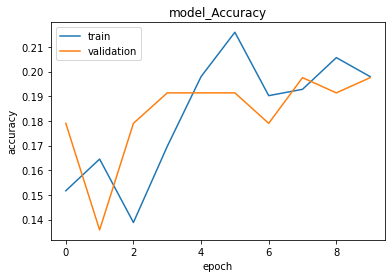

In [19]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [20]:
##### just and image plotting function
def img_plot(x):
    ndarray=prepare(x)
    plt.plot(ndarray)
    plt.show()

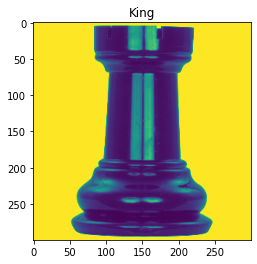

In [22]:
def prepare(file):
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_HEIGHT, IMG_HEIGHT))
    plt.imshow(new_array)
    return new_array.reshape(-1, IMG_HEIGHT, IMG_HEIGHT, 1)
#image = testX[1]#your image path
image=r'C:\Users\Lenovo\SSN Study Materials\Kayal Vizhi - DL\Image Processing\Chessman-image-dataset\Chess\Rook/00000010.jpg'
prediction = model.predict([prepare(image)])
#img_plot(image)
prediction = list(prediction[0])
#print(CATAGORIES[prediction.index(max(prediction))])
temp=CATAGORIES[prediction.index(max(prediction))]
plt.title(temp)
plt.show()